<a href="https://colab.research.google.com/github/bravoeight98/BanFakeNewsNLP_test/blob/main/BanFakeNewsNLP_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Declaring Dataset

In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/input/Fake-1K.csv
/content/input/Authentic-48K.csv


In [77]:
fake_data = pd.read_csv("/content/input/Fake-1K.csv")
true_data = pd.read_csv("/content/input/Authentic-48K.csv")

In [78]:
fake_data.head(5)

,articleID,domain,date,category,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0


In [79]:
true_data.head(5)

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1


#Data Preprocessing

In [80]:
#Creating labels for classification 
fake_data["Label"] = 0
true_data["Label"] = 1

In [82]:
#Taking a sample of the data (You can also take fully but will take longer time according to CPU Power)
data = pd.concat([fake_data.iloc[:2000,:],true_data.iloc[:2000,:]], axis=0,ignore_index = True)

In [83]:
data.head()

,articleID,domain,date,category,headline,content,label,Label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0,0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0,0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0,0


In [84]:
data.shape

(3299, 8)

In [85]:
data.category.unique()

array(['International', 'Miscellaneous', 'Sports', 'Lifestyle',
       'Politics', 'Technology', 'National', 'Entertainment', 'Crime',
       'Education', 'Finance', 'Editorial'], dtype=object)

In [86]:
data.isnull().sum()

articleID    0
domain       0
date         0
category     0
headline     0
content      0
label        0
Label        0
dtype: int64

In [87]:
#Dropping unnecessary variables
data.drop(["headline","category","date"], axis=1, inplace=True)

In [88]:
data.head()

,articleID,domain,content,label,Label
0,1,channeldhaka.news,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0,0
1,2,earki.com,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0,0
2,3,earki.com,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0,0
3,4,channeldhaka.news,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0,0
4,5,motikontho.wordpress.com,"নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0,0


In [89]:
data.content[6]

'এক গবেষণা থেকে জানা গেছে, বাংলাদেশের অন্যান্য সব জেলার চেয়ে নোয়াখালী জেলার তরুণরাই জুম্মার নামাজ পড়তে সবচেয়ে বেশি মসজিদে যান। যা কিনা শতকরার হিসাবে অন্যান্য সব জেলার চাইতে কয়েকশ গুণ পরিমাণে বেশি !জুম্মার নামাজে নোয়াখালীর মানুষদের এরকম উপস্থিতির হার দেখেই স্পষ্ঠ ধারণা পাওয়া যায়, এদের ইমানি শক্তি ভালো এবং চারিত্রিক দিক থেকে এরা হয় সৎ।এই জরীপে জুম্মার নামাজে নোয়াখালীর মুসল্লির হার  দেখা যায়৭৫%। এর পরপরই তালিকায় রয়েছে ঢাকা ৬৫%, চট্টগ্রাম ৪০%, রাজশাহী-রংপুর ৩৮% এবং বরিশাল মাত্র ১১%  !যদিও অনেকে মনে করছেন, নিমকি-জিলাপির লোভেই নোয়াখালীর বাসিন্দারা শুক্রবারে নামাজে গিয়ে থাকেন।'

In [90]:
#Creating independent and dependent variables
X = data.drop(["Label"],axis=1)
y = data["Label"]

In [91]:
X.head()

,articleID,domain,content,label
0,1,channeldhaka.news,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,"নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0


In [92]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [93]:
X.columns

Index(['articleID', 'domain', 'content', 'label'], dtype='object')

# Stemming and removing stop words

In [94]:
pip install bangla-stemmer

In [95]:
# Downloads the data.
import nltk
nltk.download('indian')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from bangla_stemmer.stemmer.stemmer import BanglaStemmer 
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Package indian is already up-to-date!


In [96]:
ps = PorterStemmer()
#ps = BanglaStemmer()
corpus=[]
for i in range(0,len(X)):
    review = re.sub("[\u0980-\u09FF']"," ",X["content"][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words("bangla")]
    review = " ".join(review)
    corpus.append(review)

#Word Vectorization

In [97]:
vector = TfidfVectorizer(max_features =5000, ngram_range=(1,3))
X = vector.fit_transform(corpus).toarray()

In [98]:
X.shape

(3299, 3633)

In [99]:
y.shape

(3299,)

#Model Building

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [101]:
X_train.shape

(2309, 3633)

In [102]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
classifier=MultinomialNB()

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)

#Model Evaluation

In [103]:
print("Accuracy of the model: {}%".format(score*100))

Accuracy of the model: 61.51515151515151%


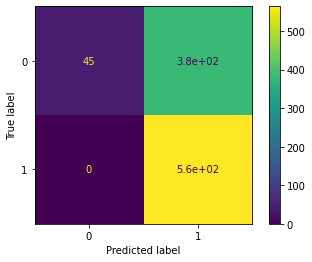

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, pred)
metrics.plot_confusion_matrix(classifier,X_test,y_test)